# Exercise: Predict Employee Resignation using Scikit-Learn Pipelines

In these exercises, we will predict which employees will quit their jobs based on a variety of real-world data. We will use pipelines to simplify data preprocessing, modelling and fine-tuning.

## Exercise 1: Data Preprocessing using Pipelines

The first exercise focuses on how to use scikit-learn pipelines to simplify data preprocessing. Your tasks are the following:

- Check data for missing values
- Define and apply a pipeline for numerical feature transformations
- Define and apply a pipeline for categorical feature transformations
- Combine both pipelines using a column transformer

## 1. Data Analysis

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the data
data = pd.read_csv("../../data/Employee.csv")

In [3]:
# check the shape of the data
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3.0,34.0,Male,No,0,0
1,Bachelors,2013.0,Pune,1.0,28.0,Female,No,3,1
2,Bachelors,2014.0,New Delhi,3.0,38.0,Female,No,2,0
3,Masters,2016.0,Bangalore,3.0,27.0,Male,No,5,1
4,Masters,2017.0,Pune,3.0,24.0,Male,Yes,2,1


In [4]:
# separate features from labels
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot'].copy()

print('Features:', X.head())
print('Labels:', y.head())

Features:    Education  JoiningYear       City  PaymentTier   Age  Gender EverBenched  \
0  Bachelors       2017.0  Bangalore          3.0  34.0    Male          No   
1  Bachelors       2013.0       Pune          1.0  28.0  Female          No   
2  Bachelors       2014.0  New Delhi          3.0  38.0  Female          No   
3    Masters       2016.0  Bangalore          3.0  27.0    Male          No   
4    Masters       2017.0       Pune          3.0  24.0    Male         Yes   

   ExperienceInCurrentDomain  
0                          0  
1                          3  
2                          2  
3                          5  
4                          2  
Labels: 0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: int64


In [5]:
# print statistics of the data
X.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
count,4643.000000,4645.000000,4645.000000,4653.000000
mean,2015.063321,2.698170,29.399139,2.905437
std,1.863236,0.561627,4.827783,1.557606
min,2012.000000,1.000000,22.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000
50%,2015.000000,3.000000,28.000000,3.000000
75%,2017.000000,3.000000,32.000000,4.000000
max,2018.000000,3.000000,41.000000,7.000000


**TODO**: Are there any missing values in the data? Any ideas how to handle these?

In [8]:
# TODO: YOUR CODE GOES HERE
X.isnull().sum()

Education                     1
JoiningYear                  10
City                         10
PaymentTier                   8
Age                           8
Gender                        3
EverBenched                   1
ExperienceInCurrentDomain     0
dtype: int64

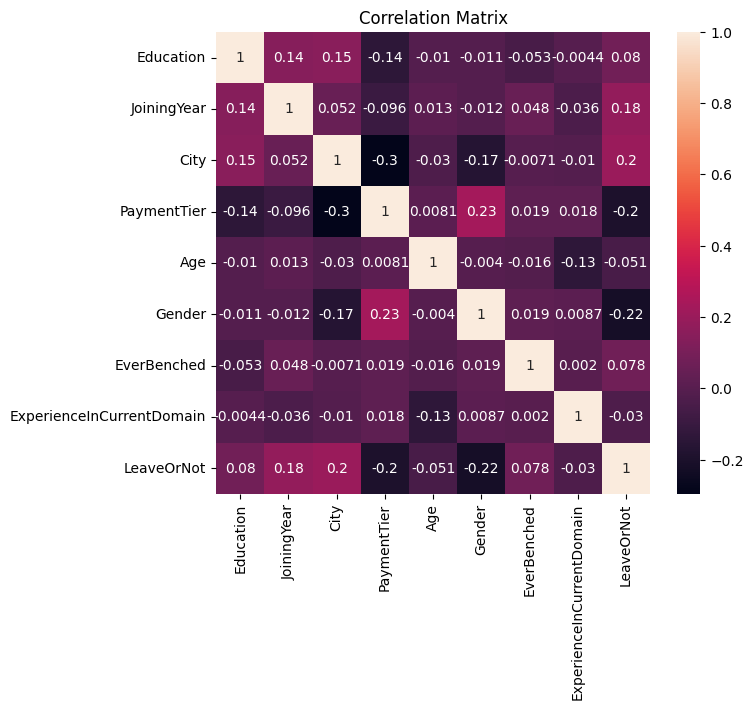

LeaveOrNot                   1.000000
City                         0.201568
JoiningYear                  0.182051
Education                    0.080038
EverBenched                  0.078143
ExperienceInCurrentDomain   -0.029931
Age                         -0.051306
PaymentTier                 -0.196919
Gender                      -0.221087
Name: LeaveOrNot, dtype: float64

In [9]:
# calculate the correlation matrix of the features
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_num = data.copy()
for c in data_num.columns:
    if data_num[c].dtype == 'object':
        # convert column from series to dataframe for the ordinal encoder to work
        column = pd.DataFrame(data_num[c]) 
        # transform the column
        data_num[c] = ordinal_encoder.fit_transform(column)

# calculate the correlation matrix
corr_matrix = data_num.corr()

# plot the correlation matrix
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Print the correlation matrix sorted by linear correlation with the label
corr_matrix["LeaveOrNot"].sort_values(ascending=False)

## 2. Data Preprocessing using Pipelines

In [10]:
# split data into numerical and categorical features
num_features = X.select_dtypes(exclude=['object']).columns
print('Numerical features:', num_features)
cat_features = X.select_dtypes(include=['object']).columns
print('Categorical features:', cat_features)

Numerical features: Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain'], dtype='object')
Categorical features: Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')


In [11]:
# split data into training and test sets (best practice to split before data preprocessing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, shuffle=True, random_state=42)

In [12]:
# impute missing values in numerical features
from sklearn.impute import SimpleImputer
X_train_num = X_train[num_features]
X_test_num = X_test[num_features]
imputer = SimpleImputer(strategy='mean')
X_train_num = imputer.fit_transform(X_train_num)
X_test_num = imputer.transform(X_test_num)

# scale numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

**TODO**: In order to simplify and replace the cell above, define a pipeline called `num_pipeline` for the numerical features that includes an imputer and a scaler. Check the scikit-learn documentation if needed!

In [15]:
# TODO: YOUR CODE GOES HERE
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"),
    ("scaler", MinMaxScaler()))
])

In [18]:
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler())])

In [16]:
# alternative definition
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="mean"), MinMaxScaler())

**TODO**: Apply the numerical pipeline and make sure that the result is the same as before!

In [17]:
# TODO: YOUR CODE GOES HERE
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler())])

In [19]:
# encode categorical features
from sklearn.preprocessing import OrdinalEncoder
X_train_cat = X_train[cat_features]
X_test_cat = X_test[cat_features]
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train_cat = ordinal_encoder.fit_transform(X_train_cat)
X_test_cat = ordinal_encoder.transform(X_test_cat)

# impute missing values in categorical features
imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = imputer.fit_transform(X_train_cat)
X_test_cat = imputer.transform(X_test_cat)

# one-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_train_cat = encoder.fit_transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)

**TODO**: To replace the cell above, define a pipeline called `cat_pipeline` for the categorical features that includes an ordinal encoder, imputer and a one-hot-encoder. Check the scikit-learn documentation if needed!

In [20]:
# TODO: YOUR CODE GOES HERE
cat_pipeline = Pipeline([
    ("ordinal encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("one-hot-encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

In [21]:
# show the pipeline diagram
cat_pipeline

Pipeline(steps=[('ordinal encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('one-hot-encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

**TODO**: Apply the categorical pipeline and make sure that the result is the same as before!

In [23]:
# TODO: YOUR CODE GOES HERE
cat_pipeline = make_pipeline(OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), SimpleImputer(strategy="most_frequent"), OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
cat_pipeline

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

**TODO**: Combine the numerical and categorical pipelines using a column transformer. Make sure to pass in the appropriate data! Apply the pipeline to the training data and store the result in an array called `X_train_transformed`.

In [26]:
# TODO: YOUR CODE GOES HERE
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object'))])

In [33]:
X_train_transformed = preprocessing.fit_transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=preprocessing.get_feature_names_out(),index=X_train.index)
print(X_train_transformed.head())
print(X_train_transformed.shape)

      num__JoiningYear  num__PaymentTier  num__Age  \
2850          0.166667               1.0  0.421053   
589           0.000000               1.0  0.157895   
2086          0.833333               0.5  0.368421   
445           0.000000               1.0  0.105263   
3654          0.833333               0.5  0.684211   

      num__ExperienceInCurrentDomain  cat__Education_0.0  cat__Education_1.0  \
2850                        0.000000                 0.0                 1.0   
589                         0.428571                 1.0                 0.0   
2086                        0.285714                 0.0                 1.0   
445                         0.285714                 0.0                 1.0   
3654                        0.285714                 0.0                 1.0   

      cat__Education_2.0  cat__City_0.0  cat__City_1.0  cat__City_2.0  \
2850                 0.0            0.0            1.0            0.0   
589                  0.0            1.0         